### **Platform information**

In [ ]:
!nvcc --version
!nvidia-smi

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
Wed Jan 11 16:18:29 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|==========================

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **BFS - Original Version**

In [ ]:
%cd '/content/drive/MyDrive/rodinia_3.1/cuda/bfs'
!ls

/content/drive/MyDrive/rodinia_3.1/cuda/bfs
bfs	kernel2.cu  Makefile	     README	 run
bfs.cu	kernel.cu   Makefile_nvidia  result.txt


In [ ]:
!make clean
!make 

rm -f bfs bfs.linkinfo result.txt
/usr/local/cuda/bin/nvcc bfs.cu -o bfs -I/usr/local/cuda/include -L/usr/local/cuda/lib64 


In [ ]:
!./bfs ../../data/bfs/graph1MW_6.txt

Reading File
Read File
Copied Everything to GPU memory
Start traversing the tree
Kernel Executed 12 times
Result stored in result.txt


In [ ]:
!nvprof ./bfs ../../data/bfs/graph1MW_6.txt

Reading File
Read File
==708== NVPROF is profiling process 708, command: ./bfs ../../data/bfs/graph1MW_6.txt
Copied Everything to GPU memory
Start traversing the tree
Kernel Executed 12 times
Result stored in result.txt
==708== Profiling application: ./bfs ../../data/bfs/graph1MW_6.txt
==708== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   64.84%  7.4219ms        18  412.33us  1.4080us  4.9825ms  [CUDA memcpy HtoD]
                   26.88%  3.0771ms        12  256.42us  36.127us  1.1349ms  Kernel(Node*, int*, bool*, bool*, bool*, int*, int)
                    4.27%  488.69us        13  37.591us  1.6960us  467.38us  [CUDA memcpy DtoH]
                    4.01%  458.77us        12  38.231us  31.487us  46.463us  Kernel2(bool*, bool*, bool*, bool*, int)
      API calls:   95.84%  368.22ms         7  52.602ms  7.2600us  367.56ms  cudaMalloc
                    3.36%  12.910ms        31  416.44us  3.6860us  5.1571ms  c

### **BFS - Unified Memory Version**

In [ ]:
%cd '/content/drive/MyDrive/rodinia_3.1/cuda/bfs_um'
!ls

/content/drive/MyDrive/rodinia_3.1/cuda/bfs_um
bfs	kernel2.cu  Makefile	     README	 run
bfs.cu	kernel.cu   Makefile_nvidia  result.txt


In [ ]:
!make clean
!make 

rm -f bfs bfs.linkinfo result.txt
/usr/local/cuda/bin/nvcc bfs.cu -o bfs -I/usr/local/cuda/include -L/usr/local/cuda/lib64 


In [ ]:
!./bfs ../../data/bfs/graph1MW_6.txt

Reading File
Allocate all unified memory
Read File
Start traversing the tree
Kernel Executed 12 times
Result stored in result.txt


In [ ]:
!nvprof ./bfs ../../data/bfs/graph1MW_6.txt

Reading File
==627== NVPROF is profiling process 627, command: ./bfs ../../data/bfs/graph1MW_6.txt
Allocate all unified memory
Read File
Start traversing the tree
Kernel Executed 12 times
Result stored in result.txt
==627== Profiling application: ./bfs ../../data/bfs/graph1MW_6.txt
==627== Warning: 24 records have invalid timestamps due to insufficient device buffer space. You can configure the buffer space using the option --device-buffer-size.
==627== Warning: 24 records have invalid timestamps due to insufficient semaphore pool size. You can configure the pool size using the option --profiling-semaphore-pool-size.
==627== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   93.76%  15.781ms        12  1.3151ms  38.815us  5.2760ms  Kernel(Node*, int*, bool*, bool*, bool*, int*, int)
                    6.24%  1.0510ms        12  87.581us  32.735us  416.66us  Kernel2(bool*, bool*, bool*, bool*, int)
      API calls:   9

### **BFS - Unified Memory Advised Version**

In [ ]:
%cd '/content/drive/MyDrive/rodinia_3.1/cuda/bfs_adv'

[Errno 2] No such file or directory: '/content/drive/MyDrive/rodinia_3.1/cuda/bfs_adv'
/content/drive/MyDrive/rodinia_3.1/cuda/bfs_um_pre


In [ ]:
!ls

bfs		      helper_image.h	       kernel.cu
bfs.cu		      helper_math.h	       Makefile
exception.h	      helper_multiprocess.cpp  Makefile_nvidia
helper_cuda_drvapi.h  helper_multiprocess.h    README
helper_cuda.h	      helper_nvJPEG.hxx        result.txt
helper_cusolver.h     helper_string.h	       run
helper_functions.h    helper_timer.h
helper_gl.h	      kernel2.cu


In [ ]:
!make clean
!make

rm -f bfs bfs.linkinfo result.txt
/usr/local/cuda/bin/nvcc bfs.cu -o bfs -I/usr/local/cuda/include -L/usr/local/cuda/lib64 


In [ ]:
!./bfs ../../data/bfs/graph1MW_6.txt

Reading File
GPU Device 0: "Turing" with compute capability 7.5

Allocate Unified Memory
Read File
Start traversing the tree
Kernel Executed 12 times
Result stored in result.txt


In [ ]:
!nvprof ./bfs ../../data/bfs/graph1MW_6.txt

Reading File
==9784== NVPROF is profiling process 9784, command: ./bfs ../../data/bfs/graph1MW_6.txt
GPU Device 0: "Turing" with compute capability 7.5

Allocate Unified Memory
Read File
Start traversing the tree
Kernel Executed 12 times
Result stored in result.txt
==9784== Profiling application: ./bfs ../../data/bfs/graph1MW_6.txt
==9784== Warning: 24 records have invalid timestamps due to insufficient device buffer space. You can configure the buffer space using the option --device-buffer-size.
==9784== Warning: 24 records have invalid timestamps due to insufficient semaphore pool size. You can configure the pool size using the option --profiling-semaphore-pool-size.
==9784== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   92.01%  13.603ms        12  1.1336ms  38.143us  3.5734ms  Kernel(Node*, int*, bool*, bool*, bool*, int*, int)
                    7.99%  1.1814ms        12  98.448us  37.856us  566.93us  Kernel2


### **BFS - Unified Memory Prefetched Version**

In [ ]:
%cd '/content/drive/MyDrive/rodinia_3.1/cuda/bfs_um_pre'
!ls

/content/drive/MyDrive/rodinia_3.1/cuda/bfs_um_pre
bfs		      helper_image.h	       kernel.cu
bfs.cu		      helper_math.h	       Makefile
exception.h	      helper_multiprocess.cpp  Makefile_nvidia
helper_cuda_drvapi.h  helper_multiprocess.h    README
helper_cuda.h	      helper_nvJPEG.hxx        result.txt
helper_cusolver.h     helper_string.h	       run
helper_functions.h    helper_timer.h
helper_gl.h	      kernel2.cu


In [ ]:
!make clean
!make

rm -f bfs bfs.linkinfo result.txt
/usr/local/cuda/bin/nvcc bfs.cu -o bfs -I/usr/local/cuda/include -L/usr/local/cuda/lib64 


In [ ]:
!./bfs ../../data/bfs/graph1MW_6.txt

GPU Device 0: "Turing" with compute capability 7.5

Reading File
Allocate all unified memory
Read File
Start traversing the tree
Kernel Executed 12 times
Result stored in result.txt


In [ ]:
!nvprof ./bfs ../../data/bfs/graph1MW_6.txt

==5397== NVPROF is profiling process 5397, command: ./bfs ../../data/bfs/graph1MW_6.txt
GPU Device 0: "Turing" with compute capability 7.5

Reading File
Allocate all unified memory
Read File
Start traversing the tree
Kernel Executed 12 times
Result stored in result.txt
==5397== Profiling application: ./bfs ../../data/bfs/graph1MW_6.txt
==5397== Warning: 24 records have invalid timestamps due to insufficient device buffer space. You can configure the buffer space using the option --device-buffer-size.
==5397== Warning: 24 records have invalid timestamps due to insufficient semaphore pool size. You can configure the pool size using the option --profiling-semaphore-pool-size.
==5397== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   90.08%  6.3296ms        12  527.47us  37.696us  1.4291ms  Kernel(Node*, int*, bool*, bool*, bool*, int*, int)
                    9.92%  696.98us        12  58.081us  32.095us  116.19us  Ker

In [ ]:
!nvprof ./bfs ../../data/bfs/graph1MW_6.txt

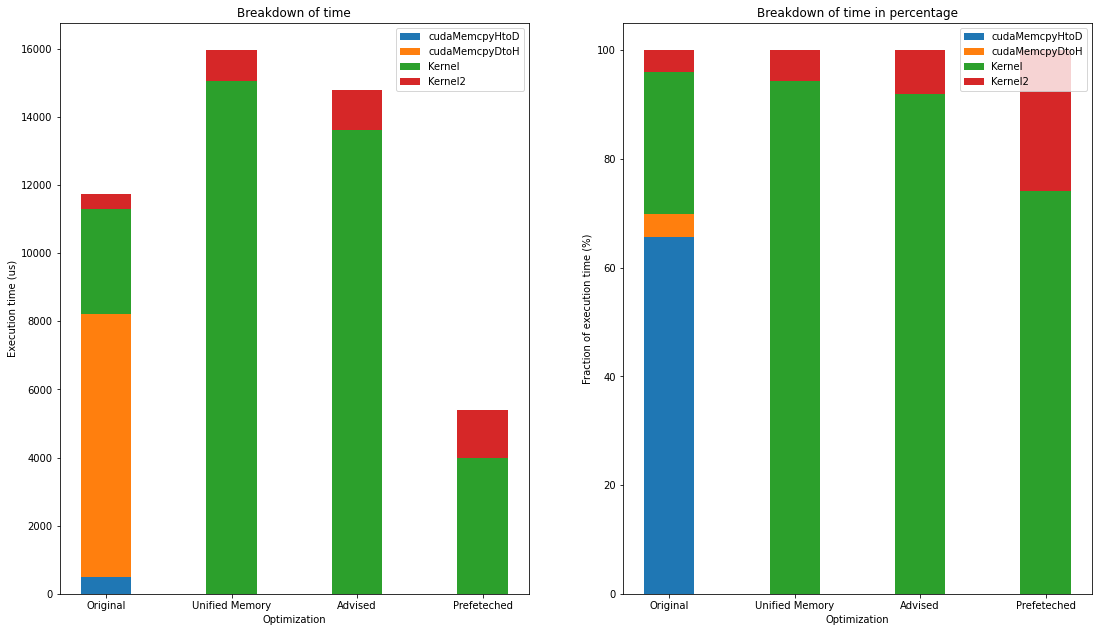

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

opt = ['Original', 'Unified Memory', 'Advised', 'Prefeteched']
dtoh = np.array([7717.8, 0, 0, 0])
htod = np.array([480.70, 0, 0, 0])
k1 = np.array([3085.5, 15054, 13603 ,3986.1])
k2 = np.array([464.99, 902.51, 1181.4 ,1395.9])

dtoh_p = np.array([4.09, 0, 0 ,0])
htod_p = np.array([65.69, 0, 0 ,0])
k1_p = np.array([26.26, 94.34, 92.01 ,74.06])
k2_p = np.array([3.96, 5.66, 7.99, 25.94])

width = 0.4
fig, ax = plt.subplots(1, 2)

ax[0].bar(opt, htod, width, label='cudaMemcpyHtoD')
ax[0].bar(opt, dtoh, width, bottom=htod, label='cudaMemcpyDtoH')
ax[0].bar(opt, k1, width, bottom=htod+dtoh, label='Kernel')
ax[0].bar(opt, k2, width, bottom=htod+dtoh+k1, label='Kernel2')


ax[0].set_xlabel('Optimization')
ax[0].set_ylabel('Execution time (us)')
ax[0].set_title('Breakdown of time')
ax[0].legend()

ax[1].bar(opt, htod_p, width, label='cudaMemcpyHtoD')
ax[1].bar(opt, dtoh_p, width, bottom=htod_p, label='cudaMemcpyDtoH')
ax[1].bar(opt, k1_p, width, bottom=htod_p+dtoh_p, label='Kernel')
ax[1].bar(opt, k2_p, width, bottom=htod_p+dtoh_p+k1_p, label='Kernel2')

ax[1].set_xlabel('Optimization')
ax[1].set_ylabel('Fraction of execution time (%)')
ax[1].set_title('Breakdown of time in percentage')
ax[1].legend()

fig.set_size_inches(18.5, 10.5, forward=True)
plt.show()

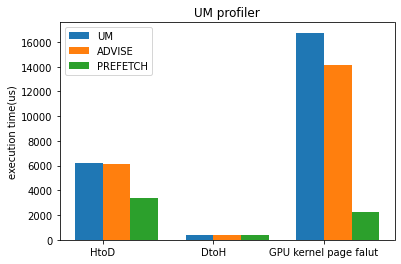

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_labels = ['HtoD', 'DtoH', 'GPU kernel page falut']
um = [6183.26, 409.685, 16748.05]
advise = [6112.943, 406.4530, 14174.67]
prefetch = [3367.53, 352.4390, 2226.379]
# xstring=
index = np.arange(3)
bar_width = 0.25

plt.bar(index, um, width=bar_width, label="UM")
plt.bar(index + bar_width, advise, width=bar_width, label="ADVISE")
plt.bar(index + 2 * bar_width, prefetch, width=bar_width, label="PREFETCH")
# labels = ['UM','ADVISE','PREFETCH']
# x_labels = ['DtoH', 'HtoD', 'GPU kernel page falut']
plt.legend()
plt.ylabel("execution time(us)")
plt.title("UM profiler")
plt.xticks(index + bar_width / 2, x_labels)
plt.show()
